<a href="https://colab.research.google.com/github/guthiLatha/ML/blob/master/Pytorch_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install atspy

In [ ]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/guthiLatha/ML/master/acc_XXXXXXXXX1316_Testing.csv")
df.Days = pd.to_datetime(df.Days)
df = df.set_index("Days")
df.head()

,Balance
Days,
2012-03-09,88870.0
2012-03-10,88870.0
2012-03-11,88870.0
2012-03-12,88870.0
2012-03-13,88870.0


In [ ]:
from atspy import AutomatedModel

INFO:root:Using CPU


In [ ]:
model_list=["HWAMS","HWAAS","TBAT"]

am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in, performance = am.forecast_insample()
forecast_out = am.forecast_outsample()
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
1779
An insample split of training size 1779 and testing size 593 has been constructed
Model HWAMS is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model TBAT is being trained for in sample prediction
Model HWAMS is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model HWAMS is being trained for out of sample prediction
Model HWAAS is being trained for out of sample prediction
Model TBAT is being trained for out of sample prediction
Model HWAMS is being used to forcast out of sample
Model HWAAS is being used to forcast ou

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


267  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble


In [ ]:
forecast_in.head()

,Target,HWAMS,HWAAS,TBAT
Date,,,,
2017-01-21,108645.18,96957.662735,42993.977110,132268.620820
2017-01-22,108645.18,87039.643417,53558.534334,156111.497245
2017-01-23,108645.18,74534.907233,56222.190675,179956.942160
2017-01-24,108645.18,64615.399876,55990.152649,203758.970743
2017-01-25,98278.48,57949.587911,55783.670094,227482.249428


In [ ]:
forecast_out.head()

,HWAMS,HWAAS,TBAT
Date,,,
2018-09-06,38757.850309,60245.626046,48304.729888
2018-09-07,48808.024823,80161.749075,48052.789283
2018-09-08,68769.649514,139335.631989,47802.162712
2018-09-09,68378.841678,206237.630765,47552.843322
2018-09-10,64253.246775,258845.973283,47304.824295


In [ ]:
performance

,Target,HWAMS,HWAAS,TBAT
rmse,0.000000e+00,1.476920e+06,9.456410e+05,1.423444e+06
mse,0.000000e+00,2.181294e+12,8.942369e+11,2.026194e+12
mean,1.173057e+06,2.105070e+05,1.317998e+06,1.883751e+06


In [ ]:
all_performance

,rmse,mse,mean
ensemble_ts,9.664108e+03,9.339498e+07,3.314712e+04
ensemble_ts__X__HWAMS,7.309839e+04,5.343375e+09,1.117349e+05
HWAMS,1.553423e+05,2.413124e+10,1.903227e+05
ensemble_ts__X__HWAMS__X__HWAAS_TBAT_HWAMS,4.249673e+05,1.805972e+11,4.640964e+05
ensemble_ts__X__HWAMS__X__HWAAS_TBAT_HWAMS__X__HWAAS__X__HWAAS_TBAT,8.122764e+05,6.597930e+11,8.468828e+05
HWAAS_TBAT_HWAMS,1.131645e+06,1.280621e+12,1.168819e+06
HWAAS,1.172952e+06,1.375816e+12,1.184057e+06
ensemble_ts__X__HWAMS__X__HWAAS_TBAT_HWAMS__X__HWAAS__X__HWAAS_TBAT__X__TBAT__X__ensemble_lgb,1.285288e+06,1.651964e+12,1.324610e+06
HWAAS_TBAT,1.621664e+06,2.629794e+12,1.658068e+06
TBAT,2.090344e+06,4.369538e+12,2.132079e+06


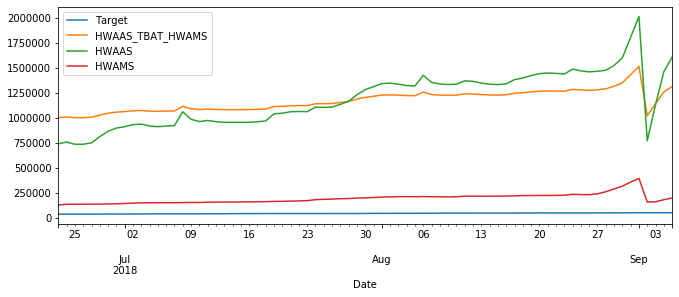

In [ ]:
all_ensemble_in[["Target","HWAAS_TBAT_HWAMS","HWAAS","HWAMS"]].plot()

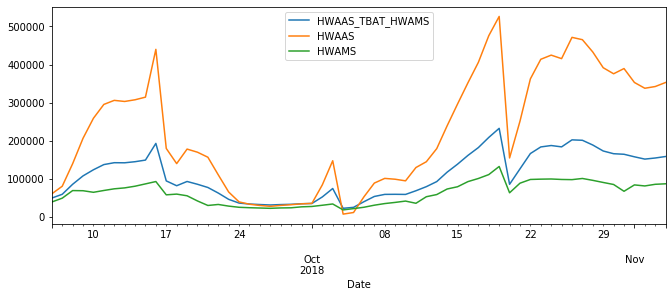

In [ ]:
all_ensemble_out[["HWAAS_TBAT_HWAMS","HWAAS","HWAMS"]].plot()

In [ ]:
am.models_dict_in

{'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f3778ffb198>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f377926ea90>,
 'TBAT': <tbats.tbats.Model.Model at 0x7f377b56e470>}

In [ ]:
am.models_dict_out

{'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f3778c5f908>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7f3778c78b38>,
 'TBAT': <tbats.tbats.Model.Model at 0x7f3778ffb4a8>}